In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("loan_approval_data.csv")

In [4]:
df.head()
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


# **Handle Missing Values**

In [5]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["float64"]).columns

In [6]:
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy="mean")
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])

In [7]:
cat_imp = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])

In [8]:
df.head()
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

# **EDA - exploratory data analysis**

Text(0.5, 1.0, 'Is Loan approved or not?')

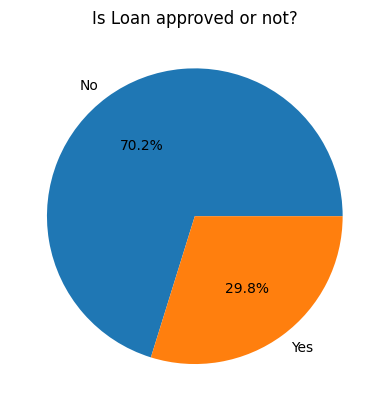

In [9]:
# how balanced our classes are?

classes_count = df["Loan_Approved"].value_counts()

plt.pie(classes_count, labels=["No","Yes"], autopct="%1.1f%%")
plt.title("Is Loan approved or not?")

[Text(0, 0, '621'), Text(0, 0, '379')]

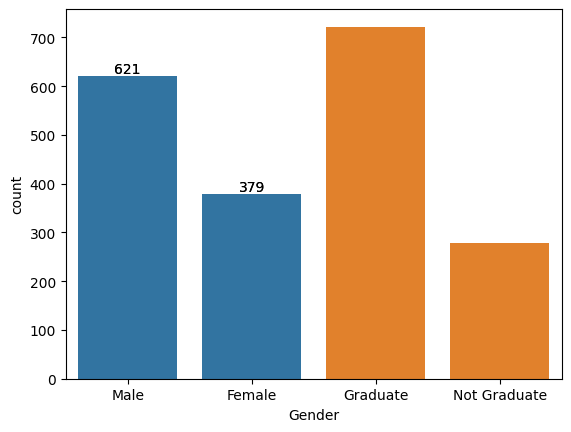

In [10]:
# analyze categories
gender_cnt = df["Gender"].value_counts()
ax = sns.barplot(gender_cnt)
ax.bar_label(ax.containers[0])

edu_cnt = df["Education_Level"].value_counts()
ax = sns.barplot(edu_cnt)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

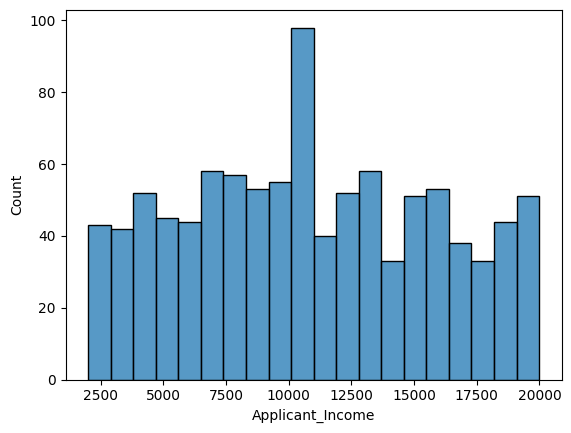

In [11]:
#analyze income

sns.histplot(
    data = df,
    x = "Applicant_Income",
    bins=20
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

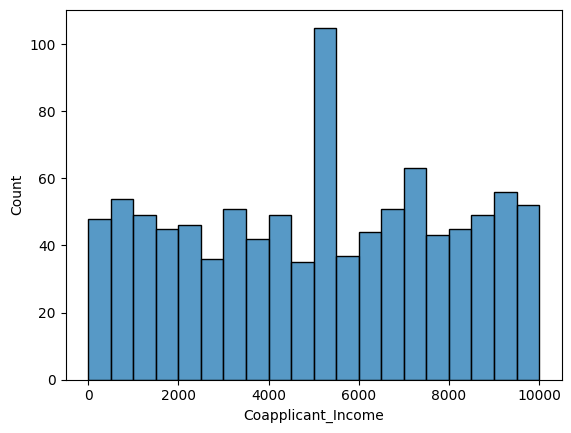

In [12]:
sns.histplot(
    data = df,
    x = "Coapplicant_Income",
    bins=20
)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

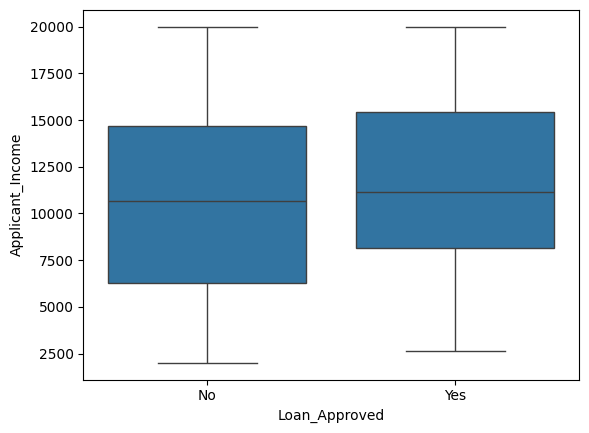

In [13]:
# outliers - box plots

sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Applicant_Income"
)

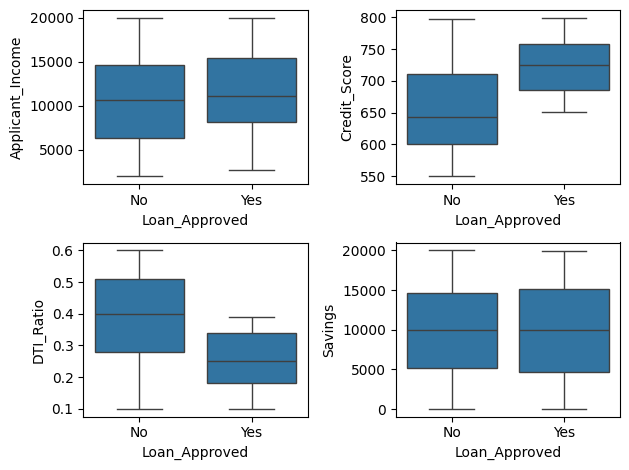

In [14]:
fig, axes = plt.subplots(2,2)

sns.boxplot(ax=axes[0,0],data=df, x="Loan_Approved", y="Applicant_Income")
sns.boxplot(ax=axes[0,1],data=df, x="Loan_Approved", y="Credit_Score")
sns.boxplot(ax=axes[1,0],data=df, x="Loan_Approved", y="DTI_Ratio")
sns.boxplot(ax=axes[1,1],data=df, x="Loan_Approved", y="Savings")

plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

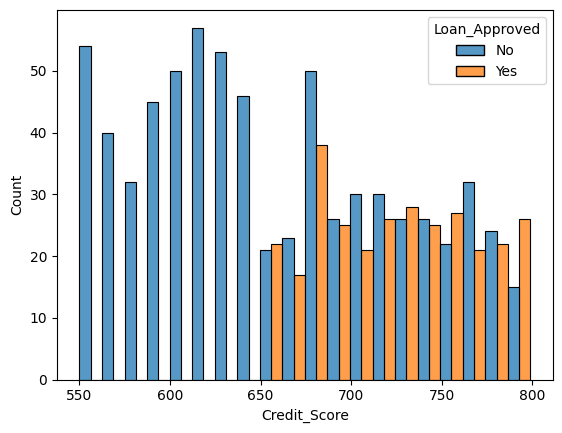

In [15]:
# Credit Score 

sns.histplot(
    data=df,
    x="Credit_Score",
    hue="Loan_Approved",
    bins=20,
    multiple="dodge"
)

In [16]:
#remove Application Id

df = df.drop("Applicant_ID", axis=1)

In [17]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


# **Encoding**

In [18]:
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    1000 non-null   float64
 1   Coapplicant_Income  1000 non-null   float64
 2   Employment_Status   1000 non-null   object 
 3   Age                 1000 non-null   float64
 4   Marital_Status      1000 non-null   object 
 5   Dependents          1000 non-null   float64
 6   Credit_Score        1000 non-null   float64
 7   Existing_Loans      1000 non-null   float64
 8   DTI_Ratio           1000 non-null   float64
 9   Savings             1000 non-null   float64
 10  Collateral_Value    1000 non-null   float64
 11  Loan_Amount         1000 non-null   float64
 12  Loan_Term           1000 non-null   float64
 13  Loan_Purpose        1000 non-null   object 
 14  Property_Area       1000 non-null   object 
 15  Education_Level     1000 non-null   object 
 16  Gender 

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Employment_Status"] = le.fit_transform(df["Employment_Status"])
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])


In [20]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,1,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,0
1,2860.0,2679.0,1,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,0
2,7390.0,2106.0,1,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,1
3,13964.0,8173.0,1,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,0
4,13284.0,4223.0,2,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,1


In [21]:
from sklearn.preprocessing import OneHotEncoder

cols = ["Employment_Status","Marital_Status","Loan_Purpose","Gender","Employer_Category"]

ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

encoded = ohe.fit_transform(df[cols])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols), index=df.index)

df = pd.concat([df.drop(columns=cols), encoded_df], axis=1)

In [22]:
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Applicant_Income              1000 non-null   float64
 1   Coapplicant_Income            1000 non-null   float64
 2   Age                           1000 non-null   float64
 3   Dependents                    1000 non-null   float64
 4   Credit_Score                  1000 non-null   float64
 5   Existing_Loans                1000 non-null   float64
 6   DTI_Ratio                     1000 non-null   float64
 7   Savings                       1000 non-null   float64
 8   Collateral_Value              1000 non-null   float64
 9   Loan_Amount                   1000 non-null   float64
 10  Loan_Term                     1000 non-null   float64
 11  Property_Area                 1000 non-null   object 
 12  Education_Level               1000 non-null   object 
 13  Loan

# **Correlation Heatmap**

<Axes: >

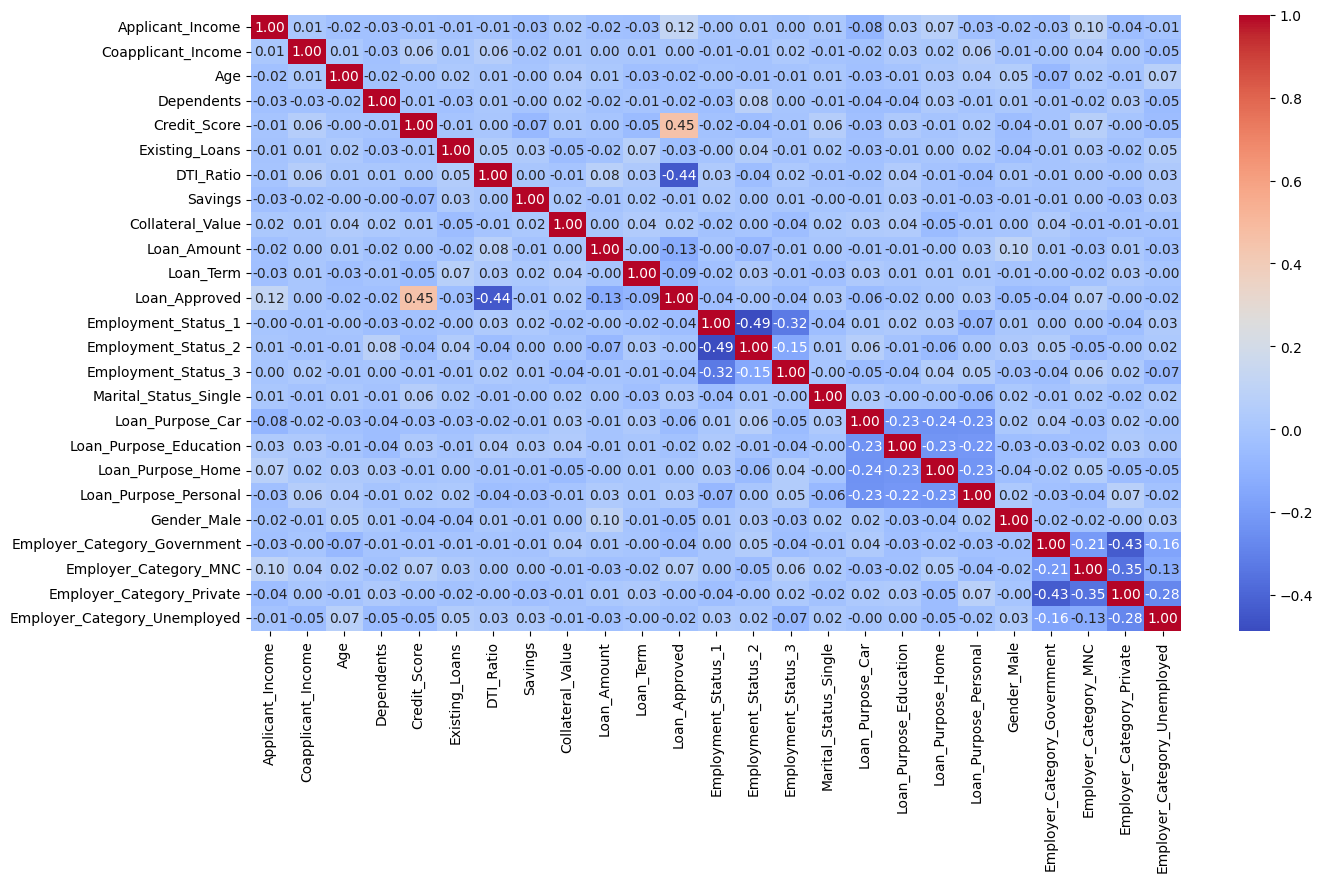

In [23]:
nums_cols = df.select_dtypes(include="number")
corr_matrix = nums_cols.corr()

plt.figure(figsize=(15,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

In [24]:
nums_cols.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                   1.000000
Credit_Score                    0.451175
Applicant_Income                0.119796
Employer_Category_MNC           0.069049
Loan_Purpose_Personal           0.034043
Marital_Status_Single           0.030182
Collateral_Value                0.021868
Coapplicant_Income              0.004230
Loan_Purpose_Home               0.002118
Employment_Status_2            -0.001337
Employer_Category_Private      -0.003347
Savings                        -0.013437
Loan_Purpose_Education         -0.016684
Employer_Category_Unemployed   -0.021468
Age                            -0.022343
Dependents                     -0.023811
Existing_Loans                 -0.034794
Employer_Category_Government   -0.039187
Employment_Status_1            -0.041428
Employment_Status_3            -0.044464
Gender_Male                    -0.054342
Loan_Purpose_Car               -0.056416
Loan_Term                      -0.086644
Loan_Amount                    -0.126499
DTI_Ratio       

In [25]:
df.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Age', 'Dependents',
       'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term', 'Property_Area',
       'Education_Level', 'Loan_Approved', 'Employment_Status_1',
       'Employment_Status_2', 'Employment_Status_3', 'Marital_Status_Single',
       'Loan_Purpose_Car', 'Loan_Purpose_Education', 'Loan_Purpose_Home',
       'Loan_Purpose_Personal', 'Gender_Male', 'Employer_Category_Government',
       'Employer_Category_MNC', 'Employer_Category_Private',
       'Employer_Category_Unemployed'],
      dtype='object')

In [26]:
x = df.drop(columns=["Loan_Approved"])
y = df["Loan_Approved"]

# **Train-Test-Split + Feature Scaling**

In [27]:
x = df.drop("Loan_Approved", axis=1)
y = df["Loan_Approved"]

In [28]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Loan_Approved, dtype: int64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [30]:
x_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
29,5890.000000,8041.0,31.000000,0.0,603.000000,0.000000,0.11,11906.0,8150.000000,29287.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
535,4779.000000,529.0,50.000000,0.0,614.000000,0.000000,0.21,5369.0,5430.000000,14786.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
695,10852.571579,8927.0,36.000000,0.0,584.000000,4.000000,0.22,3186.0,24802.792632,20522.825263,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
557,2384.000000,2113.0,39.971579,1.0,726.000000,4.000000,0.34,11882.0,48542.000000,13312.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
836,5228.000000,5249.0,42.000000,1.0,676.033684,1.950526,0.18,17669.0,24802.792632,13906.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
x_train.dtypes

Applicant_Income                float64
Coapplicant_Income              float64
Age                             float64
Dependents                      float64
Credit_Score                    float64
Existing_Loans                  float64
DTI_Ratio                       float64
Savings                         float64
Collateral_Value                float64
Loan_Amount                     float64
Loan_Term                       float64
Property_Area                    object
Education_Level                  object
Employment_Status_1             float64
Employment_Status_2             float64
Employment_Status_3             float64
Marital_Status_Single           float64
Loan_Purpose_Car                float64
Loan_Purpose_Education          float64
Loan_Purpose_Home               float64
Loan_Purpose_Personal           float64
Gender_Male                     float64
Employer_Category_Government    float64
Employer_Category_MNC           float64
Employer_Category_Private       float64


In [32]:
import pandas as pd

# One-hot encode categorical columns
x_train = pd.get_dummies(x_train, columns=['Property_Area', 'Education_Level'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['Property_Area', 'Education_Level'], drop_first=True)

# Align train and test columns
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
x_test_scaled

array([[ 0.42610546,  0.55091079,  1.19037073, ...,  2.081666  ,
        -1.05395348,  1.62879343],
       [ 1.00971366,  0.58995935,  0.18392964, ..., -0.48038446,
        -1.05395348, -0.6139514 ],
       [-0.67557096, -0.54558674,  1.09887608, ..., -0.48038446,
        -1.05395348,  1.62879343],
       ...,
       [-0.67980585, -0.10106072,  1.28186537, ..., -0.48038446,
        -1.05395348, -0.6139514 ],
       [-0.37650705, -0.97825874, -0.54802752, ..., -0.48038446,
        -1.05395348, -0.6139514 ],
       [-0.73647272, -1.24497436,  0.73289751, ..., -0.48038446,
        -1.05395348, -0.6139514 ]], shape=(200, 27))

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **Train & Evaluate Model**

In [36]:
#Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(x_train_scaled, y_train)

y_pred = log_model.predict(x_test_scaled)

#Evaluation
print("Logistic Regression Model")
print("precision: ",precision_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))
print("Accurancy: ",accuracy_score(y_test,y_pred))
print("CM: ",confusion_matrix(y_test,y_pred))

Logistic Regression Model
precision:  0.7833333333333333
recall:  0.7704918032786885
f1 score:  0.7768595041322314
Accurancy:  0.865
CM:  [[126  13]
 [ 14  47]]


In [37]:
#Knn
from sklearn.neighbors import KNeighborsClassifier

log_model = KNeighborsClassifier(n_neighbors=7)
log_model.fit(x_train_scaled, y_train)

y_pred = log_model.predict(x_test_scaled)

#Evaluation
print("KNN Model")
print("precision: ",precision_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))
print("Accurancy: ",accuracy_score(y_test,y_pred))
print("CM: ",confusion_matrix(y_test,y_pred))

KNN Model
precision:  0.6086956521739131
recall:  0.45901639344262296
f1 score:  0.5233644859813084
Accurancy:  0.745
CM:  [[121  18]
 [ 33  28]]


In [38]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)

y_pred = nb_model.predict(x_test_scaled)

#Evaluation
print("Naive Bayes Model")
print("precision: ",precision_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))
print("Accurancy: ",accuracy_score(y_test,y_pred))
print("CM: ",confusion_matrix(y_test,y_pred))

Naive Bayes Model
precision:  0.8035714285714286
recall:  0.7377049180327869
f1 score:  0.7692307692307693
Accurancy:  0.865
CM:  [[128  11]
 [ 16  45]]


# Best Model on the basis of Precision => Naive Bayes

# **Feature Engineering**

In [ ]:
df["DTI_Ratio_sq"] = df["DTI_Ratio"] ** 2
df["Credit_Score_sq"] = df["Credit_Score"] ** 2

# df["Applicant_Income_log"] = np.log1p(df["Applicant_Income"])

x=df.drop(columns=["Loan_Approved", "Credit_Score", "DTI_Ratio", "Applicant_Income"])
y=df["Loan_Approved"]

#Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

#Scaling
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [40]:
x_train.head()

,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Property_Area,Education_Level,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,DTI_Ratio_sq,Credit_Score_sq
29,8041.0,31.000000,0.0,0.000000,11906.0,8150.000000,29287.000000,12.0,Rural,Not Graduate,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0121,363609.000000
535,529.0,50.000000,0.0,0.000000,5369.0,5430.000000,14786.000000,72.0,Urban,Not Graduate,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0441,376996.000000
695,8927.0,36.000000,0.0,4.000000,3186.0,24802.792632,20522.825263,48.0,Semiurban,Not Graduate,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0484,341056.000000
557,2113.0,39.971579,1.0,4.000000,11882.0,48542.000000,13312.000000,24.0,Urban,Graduate,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.1156,527076.000000
836,5249.0,42.000000,1.0,1.950526,17669.0,24802.792632,13906.000000,84.0,Urban,Graduate,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0324,457021.542187


In [41]:
#Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(x_train_scaled, y_train)

y_pred = log_model.predict(x_test_scaled)

#Evaluation
print("Logistic Regression Model")
print("precision: ",precision_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))
print("Accurancy: ",accuracy_score(y_test,y_pred))
print("CM: ",confusion_matrix(y_test,y_pred))

Logistic Regression Model
precision:  0.7833333333333333
recall:  0.7704918032786885
f1 score:  0.7768595041322314
Accurancy:  0.865
CM:  [[126  13]
 [ 14  47]]


In [42]:
#Knn
from sklearn.neighbors import KNeighborsClassifier

log_model = KNeighborsClassifier(n_neighbors=7)
log_model.fit(x_train_scaled, y_train)

y_pred = log_model.predict(x_test_scaled)

#Evaluation
print("KNN Model")
print("precision: ",precision_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))
print("Accurancy: ",accuracy_score(y_test,y_pred))
print("CM: ",confusion_matrix(y_test,y_pred))

KNN Model
precision:  0.6086956521739131
recall:  0.45901639344262296
f1 score:  0.5233644859813084
Accurancy:  0.745
CM:  [[121  18]
 [ 33  28]]


In [43]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)

y_pred = nb_model.predict(x_test_scaled)

#Evaluation
print("Naive Bayes Model")
print("precision: ",precision_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))
print("Accurancy: ",accuracy_score(y_test,y_pred))
print("CM: ",confusion_matrix(y_test,y_pred))

Naive Bayes Model
precision:  0.8035714285714286
recall:  0.7377049180327869
f1 score:  0.7692307692307693
Accurancy:  0.865
CM:  [[128  11]
 [ 16  45]]
